In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
def read(data):
    df = pd.read_csv(data)
    df.columns = [col.lower().replace(' ','_') for col in df.columns]
    return df

In [4]:
df = read(data = 'HousingData.csv')

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. 

B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 

LSTAT: % \lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [5]:
df.head(5)

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [6]:
df.tail(5)

crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273     21.0   

          b  lstat  medv  
501  391.99    NaN  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     486 non-null    float64
 1   zn       486 non-null    float64
 2   indus    486 non-null    float64
 3   chas     486 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      486 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    486 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Step 1 dealing with missing values

In [8]:
df.isnull().sum()

crim       20
zn         20
indus      20
chas       20
nox         0
rm          0
age        20
dis         0
rad         0
tax         0
ptratio     0
b           0
lstat      20
medv        0
dtype: int64

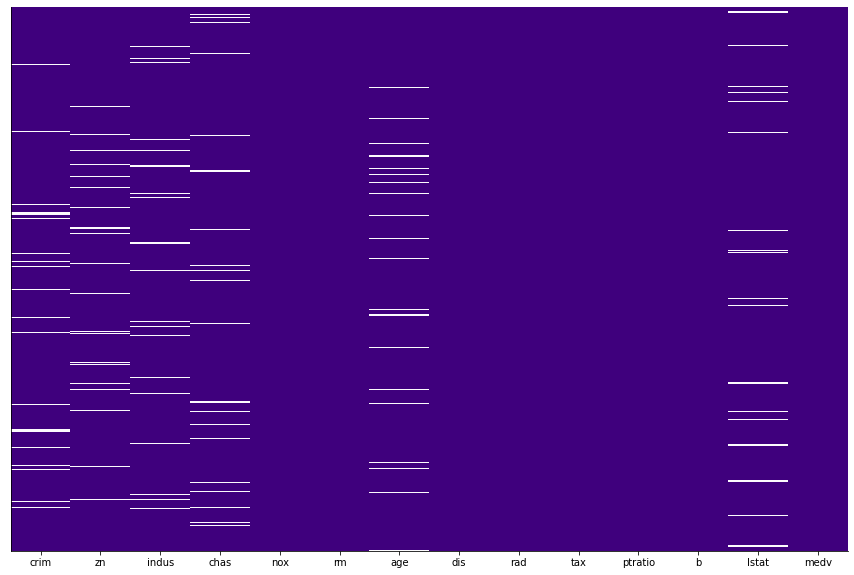

In [9]:
plt.figure(figsize= (15,10))
sns.heatmap(df.isnull(),yticklabels = False, cbar=False, cmap = 'Purples_r')
sns.despine()

In [10]:
## Imputing method 
# i used mean imputing method
imputed_df = df.fillna(df.mean())

In [11]:
imputed_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [12]:
sns.heatmap(imputed_df.isnull(), yticklabels=False, cbar=False, cmap= 'flare_r')
sns.despine()

In [13]:
imputed_df.duplicated().sum() #Found no duplicate values

0

In [14]:
imputed_df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.921051    6.699165    0.250233    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.290250    0.000000    9.900000    0.000000    0.538000    6.208500   
75%      3.611874   11.211934   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.439466    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.925000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     74.450000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.575000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.715432   22.532806  
std      7.012739    9.197104  
min      1.730000    5.000000  
25%      7.230000   17.025000  
50%     11.995000   21.200000  
75%     16.570000   25.000000  
max     37.970000   50.000000

In [15]:
#plt.figure(figsize= (20,15))
#sns.boxplot(x='variable', y='value', data= pd.melt(df))
# This code is used for plotting box plot for all the columns in one shot

## crim


In [16]:
def univariate(x):
    print('Mean:',x.mean())
    print('Median:',x.median())
    print('Minimum value:', x.min())
    print('Maximum Value:', x.max())
    print('Standard Deviation:', x.std())
    print('Variance:', x.var())

    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
    sns.scatterplot(df.index,x, ax= axes[0])
    sns.kdeplot(x, shade=True, ax = axes[1])
    sns.despine()

univariate(imputed_df['crim'])

Mean: 3.611873971193416
Median: 0.29025
Minimum value: 0.00632
Maximum Value: 88.9762
Standard Deviation: 8.545770393021591
Variance: 73.03019161024442


## zn


Mean: 11.211934156378602
Median: 0.0
Minimum value: 0.0
Maximum Value: 100.0
Standard Deviation: 22.92105136348917
Variance: 525.3745956077088


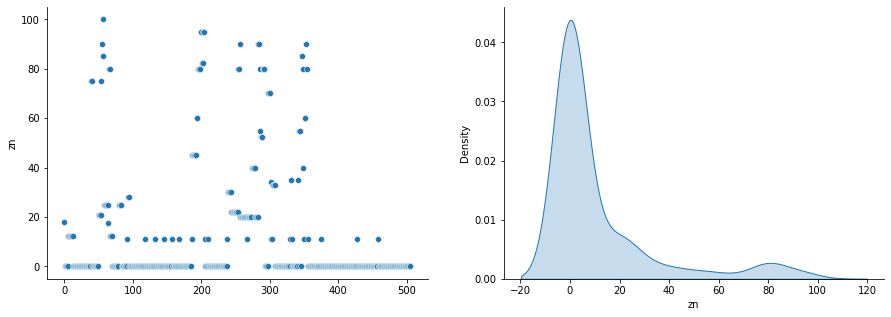

In [17]:
univariate(imputed_df['zn'])

## indus


Mean: 11.083991769547326
Median: 9.9
Minimum value: 0.46
Maximum Value: 27.74
Standard Deviation: 6.699164755972014
Variance: 44.87880842765758


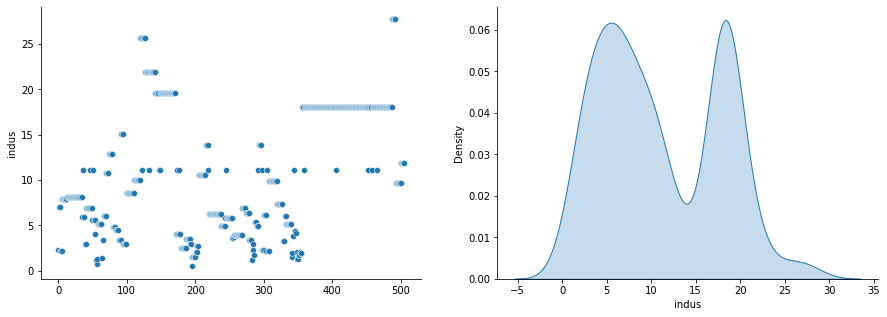

In [18]:
univariate(imputed_df['indus'])

## chas


Mean: 0.06995884773662552
Median: 0.0
Minimum value: 0.0
Maximum Value: 1.0
Standard Deviation: 0.2502331553443183
Variance: 0.06261663203357372


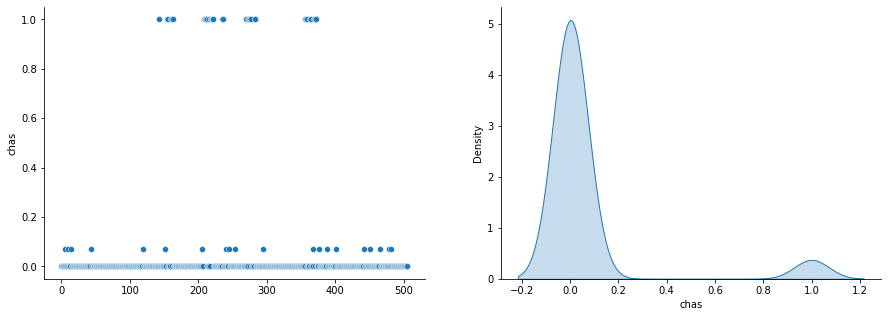

In [19]:
univariate(imputed_df['chas'])

## nox


Mean: 0.5546950592885376
Median: 0.538
Minimum value: 0.385
Maximum Value: 0.871
Standard Deviation: 0.11587767566755595
Variance: 0.013427635718115288


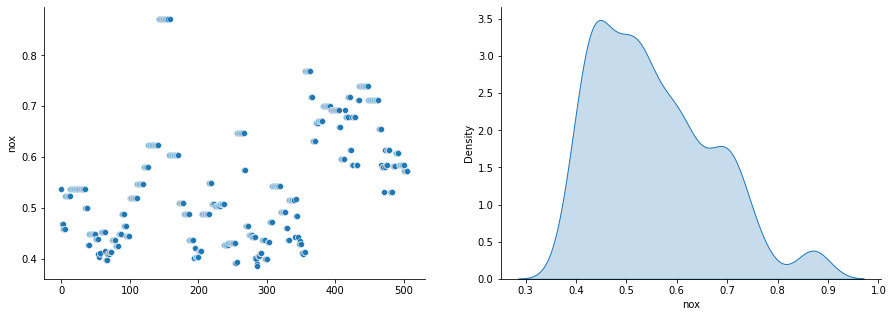

In [20]:
univariate(imputed_df['nox'])

## rm


Mean: 6.284634387351779
Median: 6.2085
Minimum value: 3.561
Maximum Value: 8.78
Standard Deviation: 0.7026171434153233
Variance: 0.49367085022110907


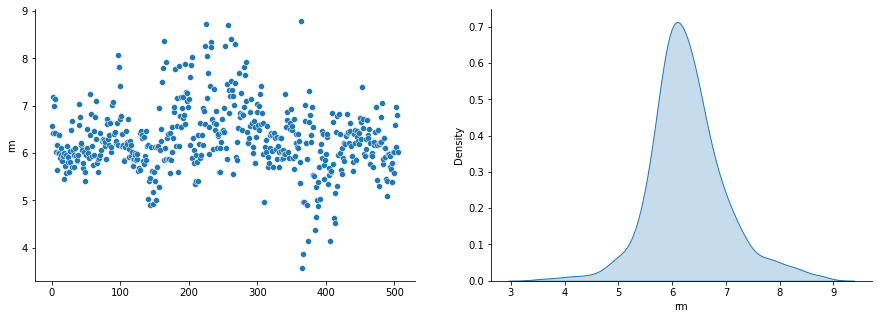

In [21]:
univariate(imputed_df['rm'])

## age


Mean: 68.5185185185185
Median: 74.45
Minimum value: 2.9
Maximum Value: 100.0
Standard Deviation: 27.439466168829945
Variance: 752.924303630363


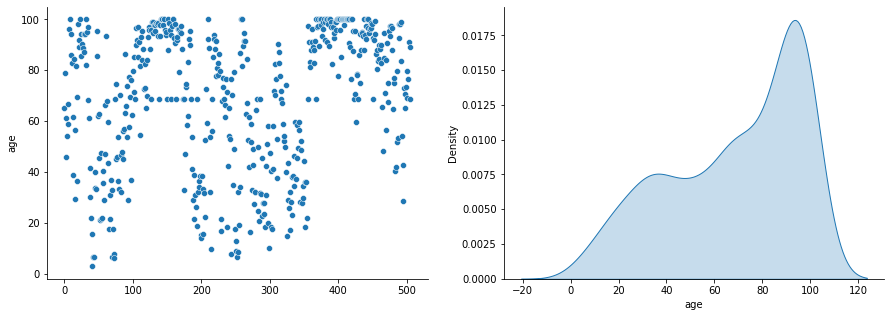

In [22]:
univariate(imputed_df['age'])

## dis


Mean: 3.795042687747036
Median: 3.2074499999999997
Minimum value: 1.1296
Maximum Value: 12.1265
Standard Deviation: 2.105710126627611
Variance: 4.434015137382068


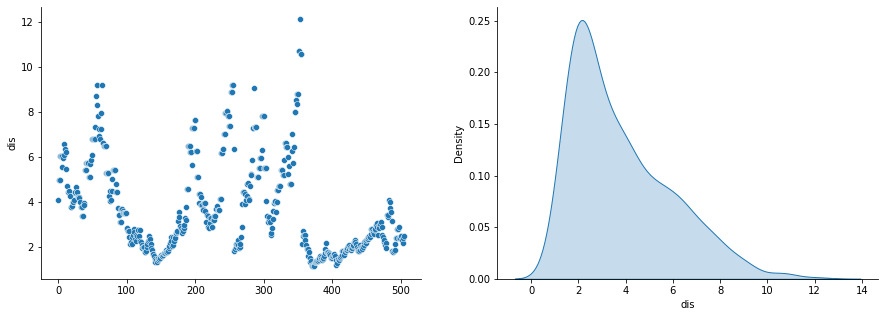

In [23]:
univariate(imputed_df['dis'])

## rad


Mean: 9.549407114624506
Median: 5.0
Minimum value: 1
Maximum Value: 24
Standard Deviation: 8.707259384239366
Variance: 75.81636598442452


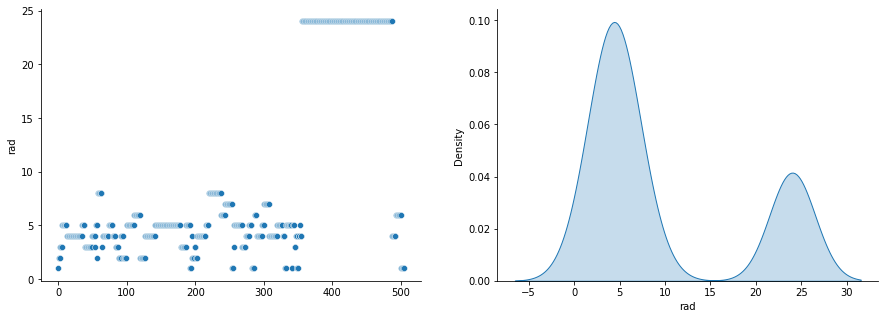

In [24]:
univariate(imputed_df['rad'])

## tax


Mean: 408.2371541501976
Median: 330.0
Minimum value: 187
Maximum Value: 711
Standard Deviation: 168.53711605495903
Variance: 28404.75948812273


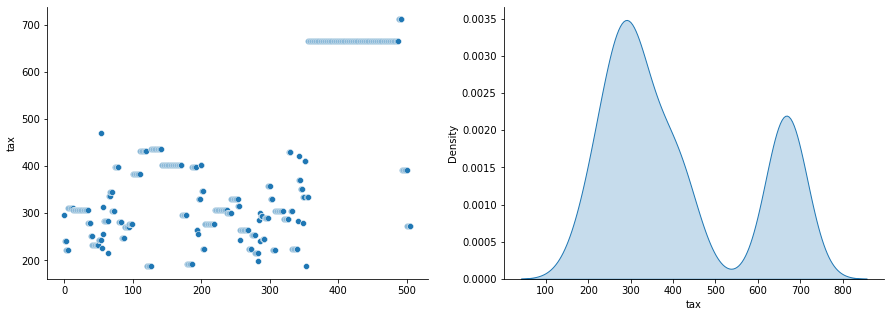

In [25]:
univariate(imputed_df['tax'])

## ptratio


Mean: 18.455533596837945
Median: 19.05
Minimum value: 12.6
Maximum Value: 22.0
Standard Deviation: 2.1649455237144406
Variance: 4.686989120651194


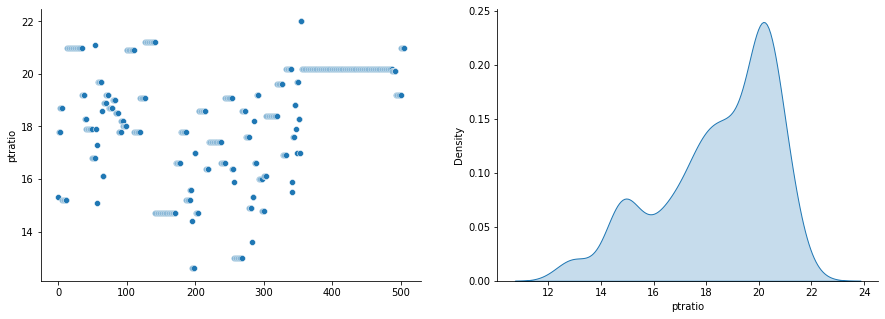

In [26]:
univariate(imputed_df['ptratio'])

## b


Mean: 356.6740316205534
Median: 391.44
Minimum value: 0.32
Maximum Value: 396.9
Standard Deviation: 91.29486438415783
Variance: 8334.75226292177


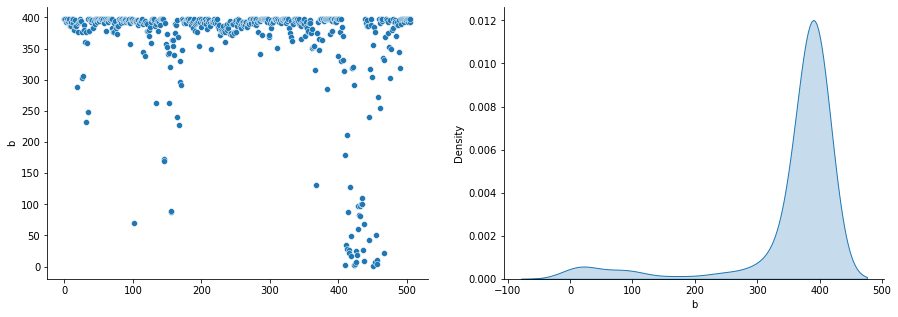

In [27]:
univariate(imputed_df['b'])

## lstat


Mean: 12.715432098765433
Median: 11.995000000000001
Minimum value: 1.73
Maximum Value: 37.97
Standard Deviation: 7.012738940248506
Variance: 49.17850744407774


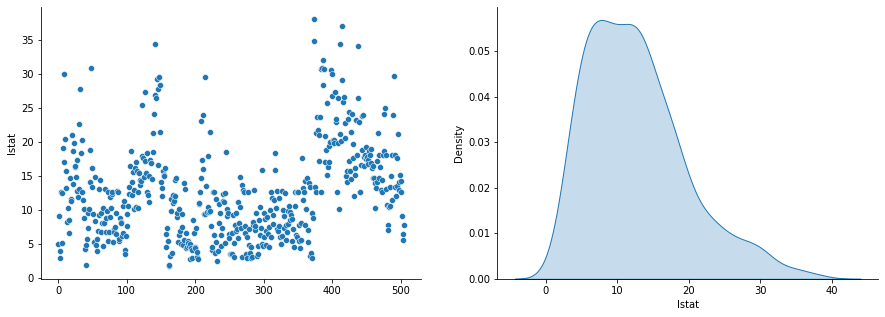

In [28]:
univariate(imputed_df['lstat'])

## medv

Mean: 22.532806324110677
Median: 21.2
Minimum value: 5.0
Maximum Value: 50.0
Standard Deviation: 9.197104087379818
Variance: 84.58672359409856


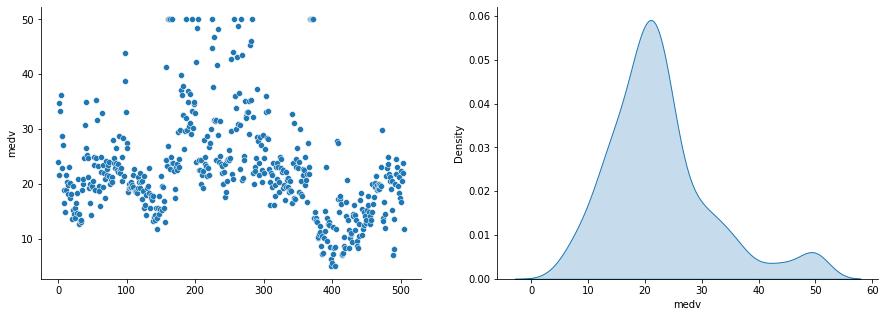

In [29]:
univariate(imputed_df['medv'])

### Bivariate analysis

## Crim

correlation: -0.18292998770146357


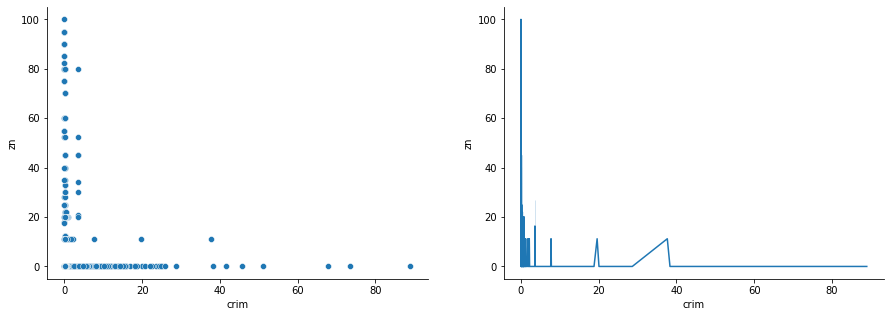

In [30]:
def bi_variate(x,y, data):
    print('correlation:',list(pearsonr(x,y))[0])
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
    sns.scatterplot(x= x, y= y, data = data , ax = axes[0])
    sns.lineplot(x=x,y=y, data = data, ax= axes[1])
    sns.despine()

bi_variate(x = imputed_df['crim'],y=  imputed_df['zn'], data = imputed_df)

correlation: 0.3911613741169966


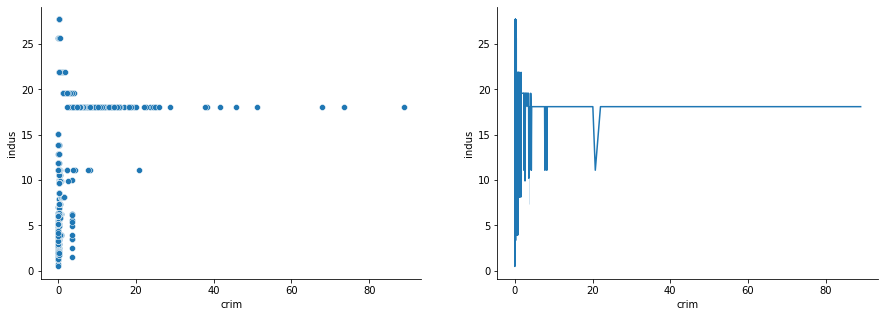

In [31]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['indus'], data = imputed_df)

correlation: -0.0522228821169737


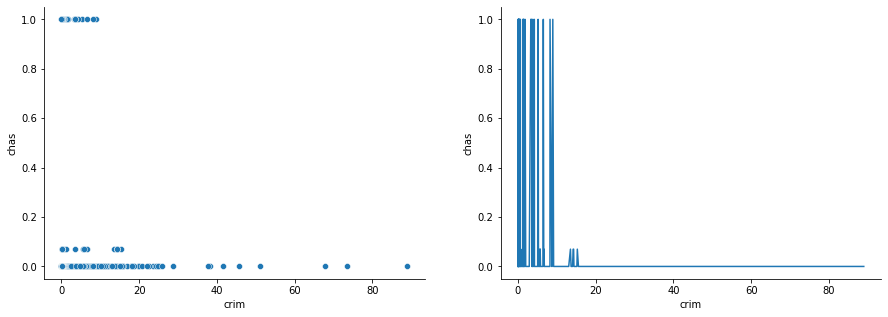

In [32]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['chas'], data = imputed_df)

correlation: 0.41037672369945605


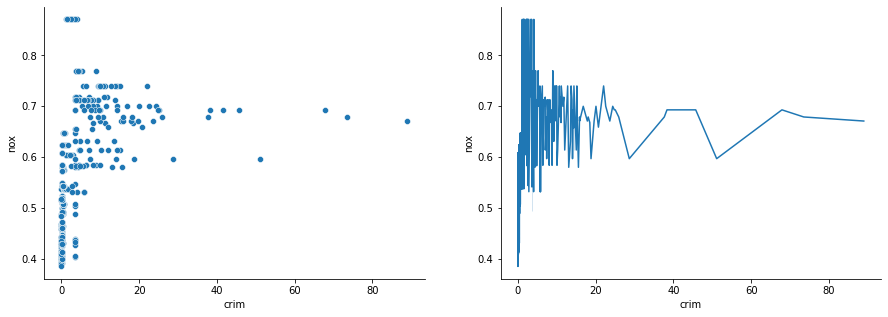

In [33]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['nox'], data = imputed_df)

correlation: -0.2154337736093774


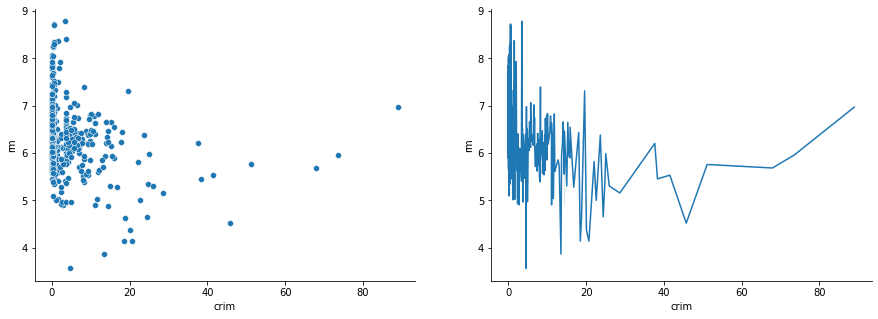

In [34]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['rm'], data = imputed_df)

correlation: 0.3449336124530832


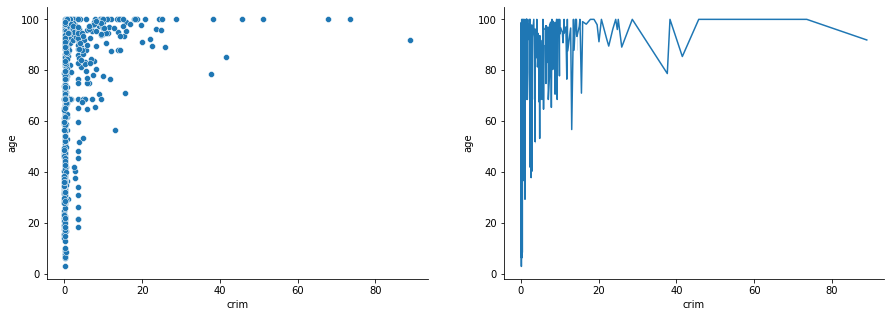

In [35]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['age'], data = imputed_df)

correlation: -0.36652274327725454


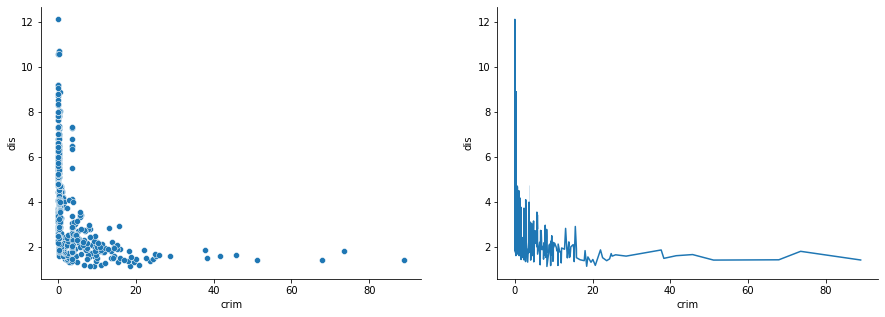

In [36]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['dis'], data = imputed_df)

correlation: 0.6088863198102894


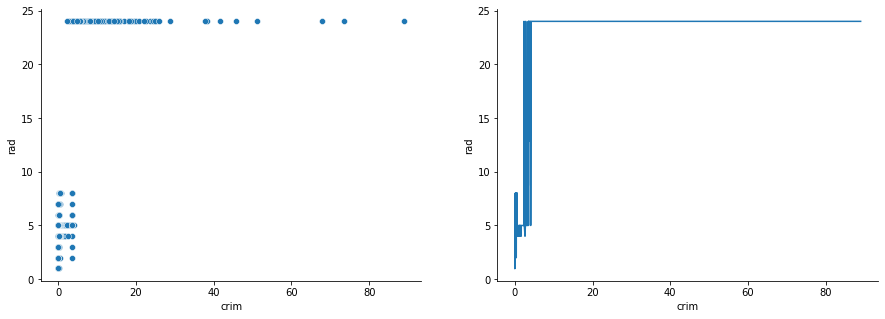

In [37]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['rad'], data = imputed_df)

correlation: 0.5665278222952521


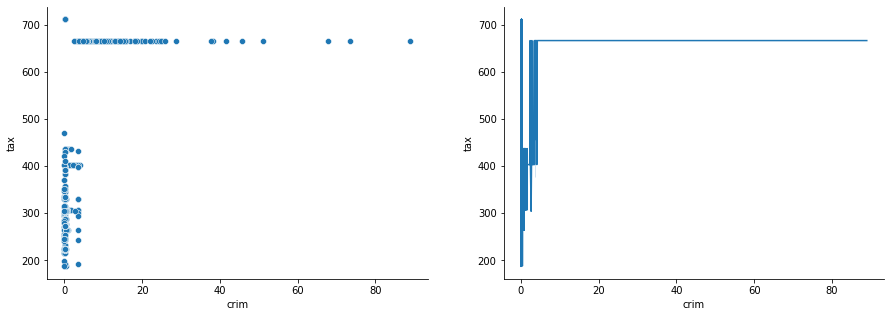

In [38]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['tax'], data = imputed_df)

correlation: 0.27338388528770924


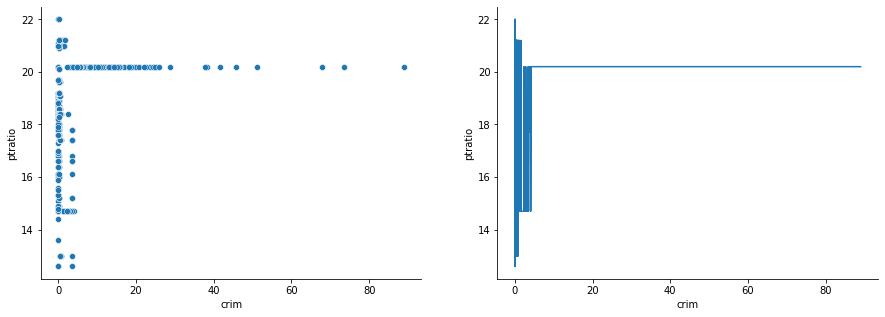

In [39]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['ptratio'], data = imputed_df)

correlation: -0.37016342257280205


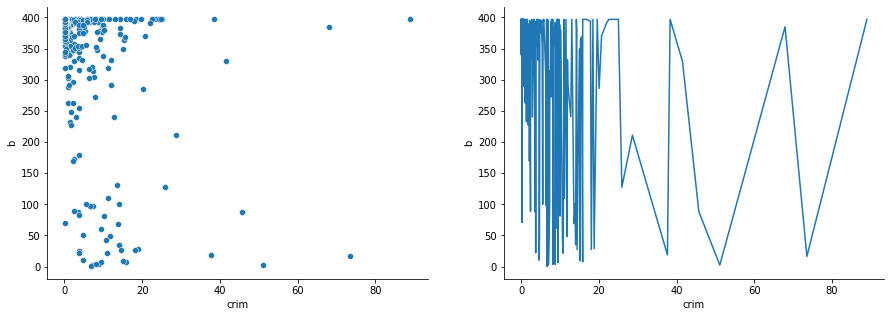

In [40]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['b'], data = imputed_df)

correlation: 0.43404448530202444


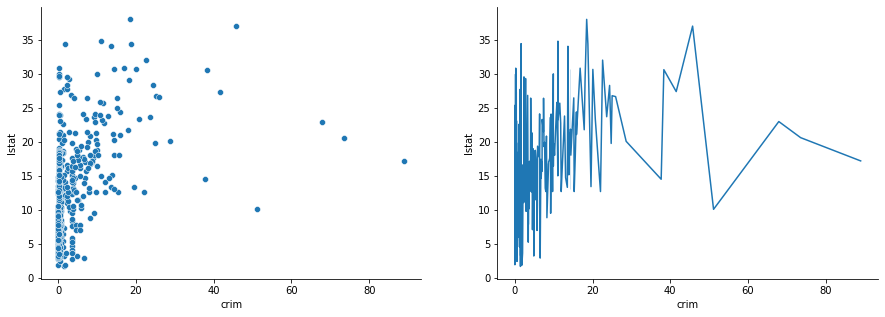

In [41]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['lstat'], data = imputed_df)

correlation: -0.3796954729460306


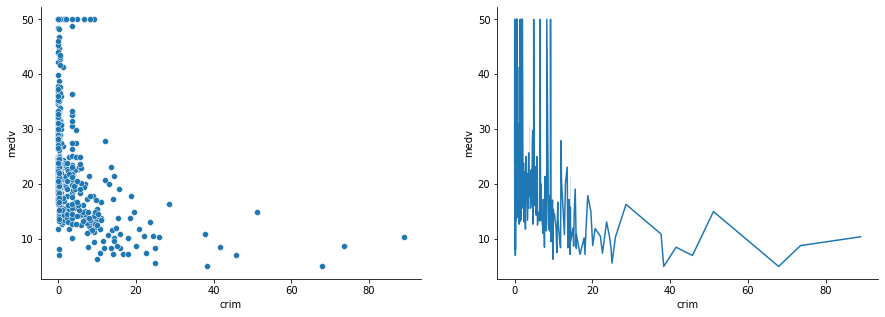

In [42]:
bi_variate(x = imputed_df['crim'],y=  imputed_df['medv'], data = imputed_df)

## zn

correlation: -0.5133362158758284


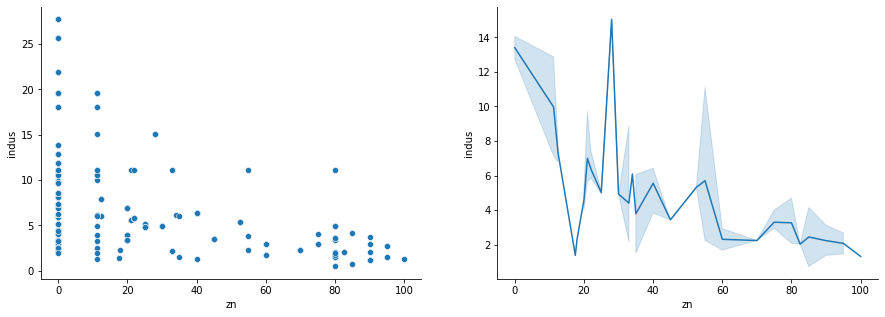

In [43]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['indus'], data = imputed_df)

correlation: -0.03614653384519702


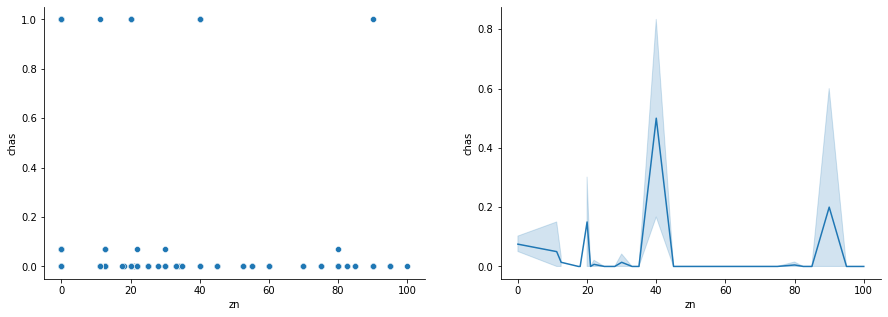

In [44]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['chas'], data = imputed_df)

correlation: -0.5022874178893425


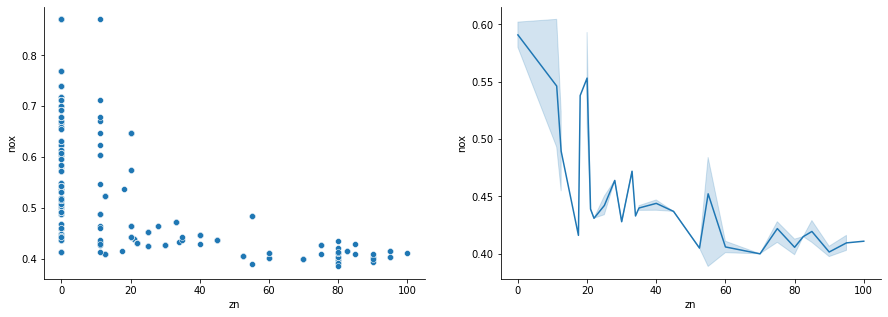

In [45]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['nox'], data = imputed_df)

correlation: 0.31654960511945995


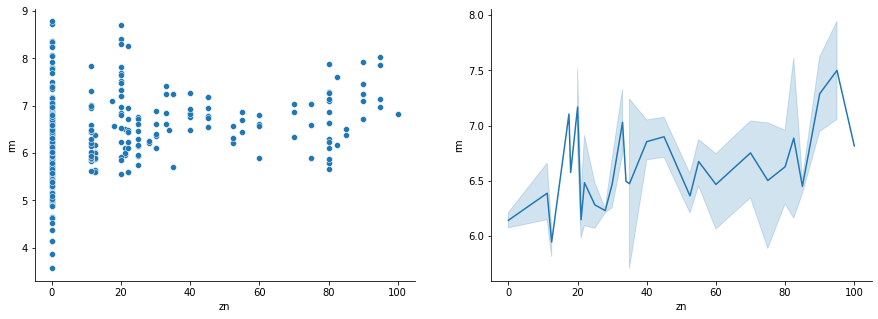

In [46]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['rm'], data = imputed_df)

correlation: -0.5412744950472728


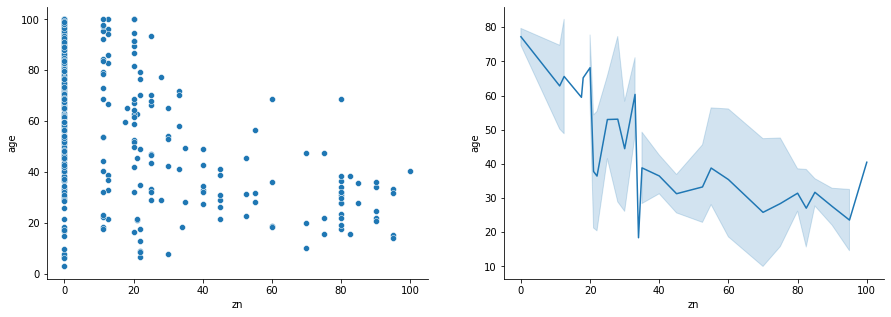

In [47]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['age'], data = imputed_df)

correlation: 0.638388112661589


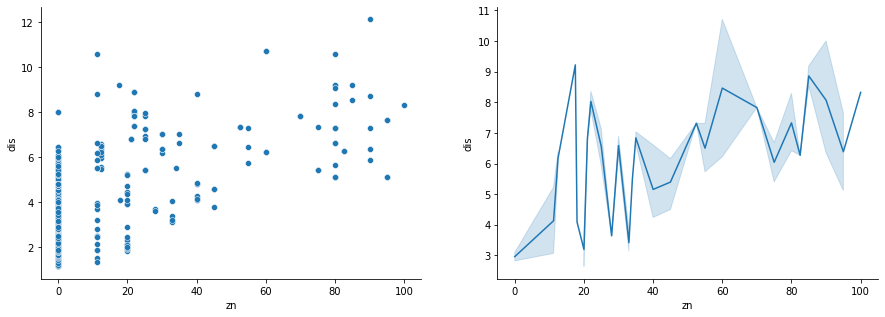

In [48]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['dis'], data = imputed_df)

correlation: -0.3063163608397592


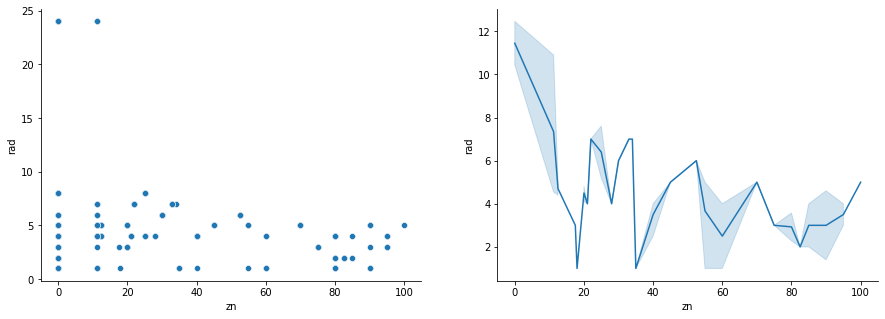

In [49]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['rad'], data = imputed_df)

correlation: -0.30833428567898696


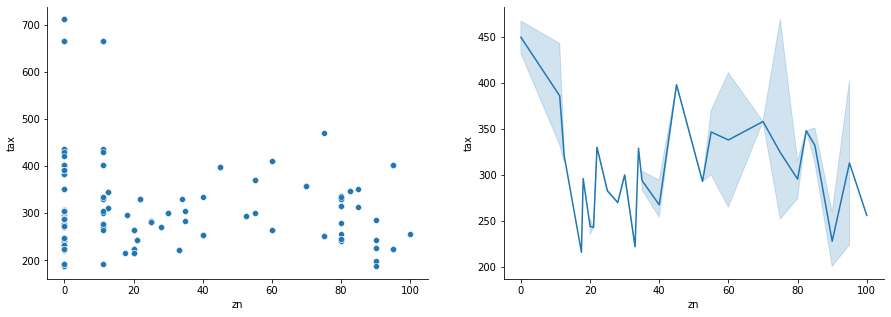

In [50]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['tax'], data = imputed_df)

correlation: -0.4030854083398889


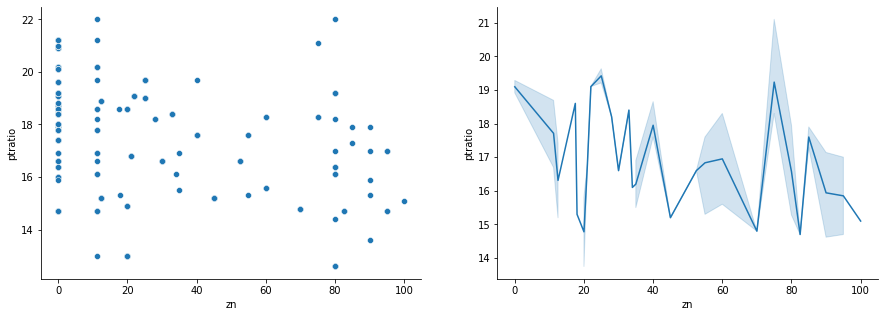

In [51]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['ptratio'], data = imputed_df)

correlation: 0.1674313527793612


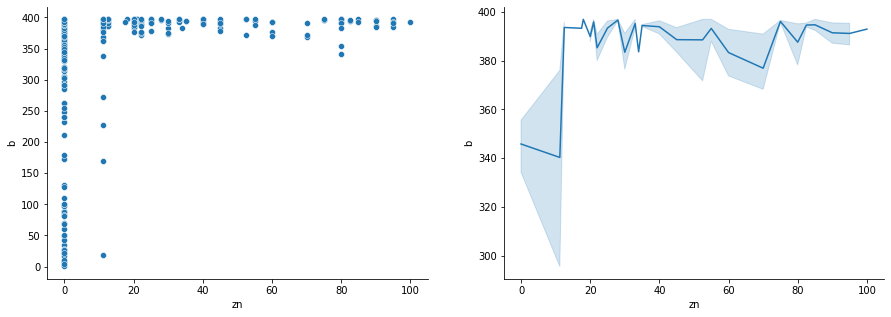

In [52]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['b'], data = imputed_df)

correlation: -0.4075490746486788


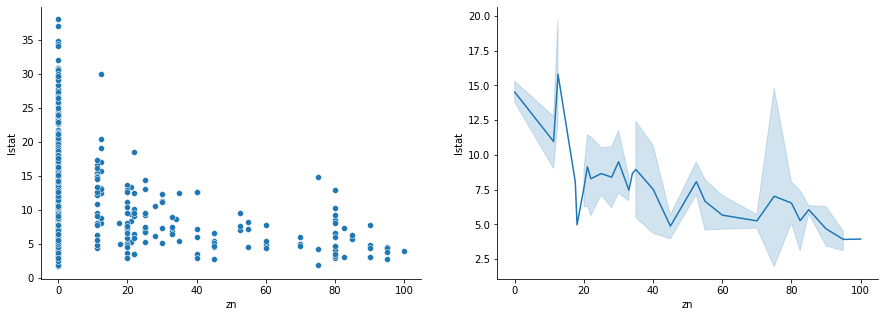

In [53]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['lstat'], data = imputed_df)

correlation: 0.36594311944043983


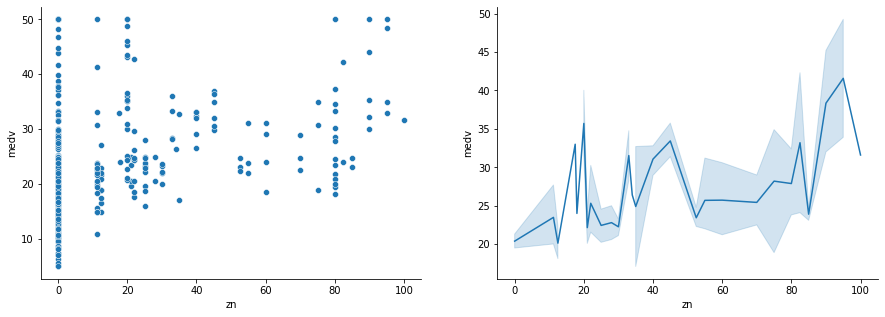

In [54]:
bi_variate(x = imputed_df['zn'],y=  imputed_df['medv'], data = imputed_df)

### indus

correlation: 0.058034842167171044


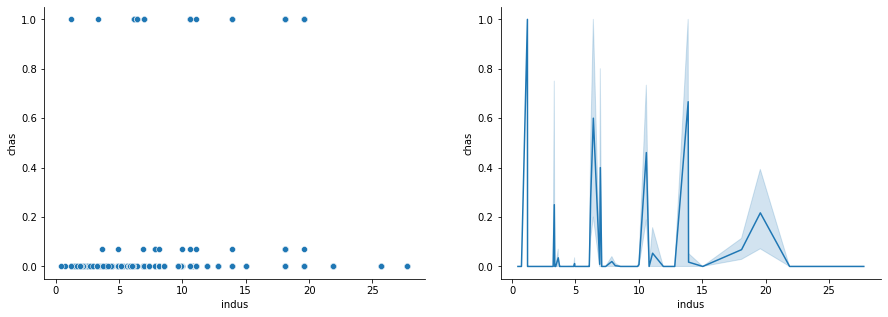

In [55]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['chas'], data = imputed_df)

correlation: 0.74096466434146


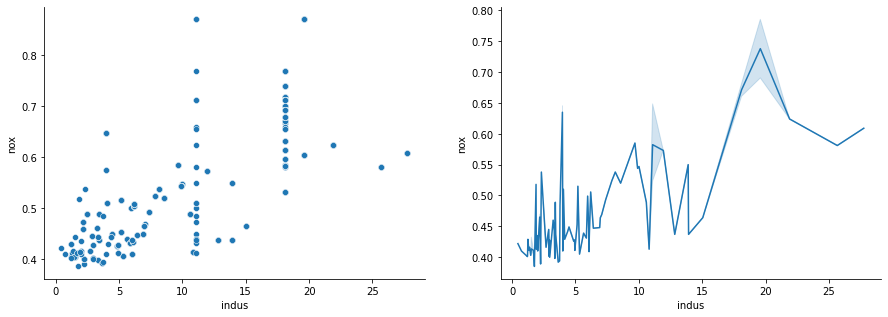

In [56]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['nox'], data = imputed_df)

correlation: 0.74096466434146


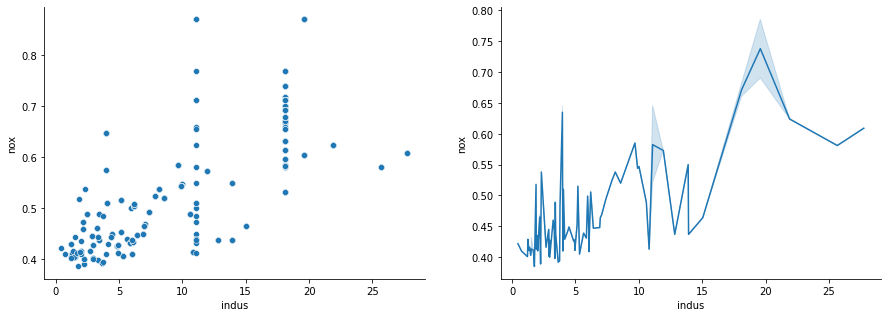

In [57]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['nox'], data = imputed_df)

correlation: -0.38145737411653163


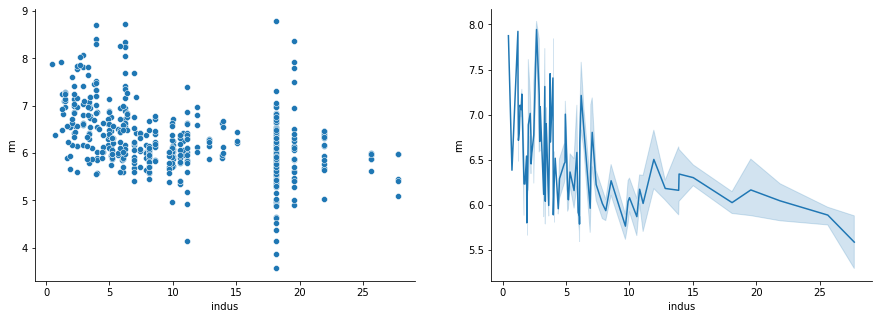

In [58]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['rm'], data = imputed_df)

correlation: 0.6145922522414309


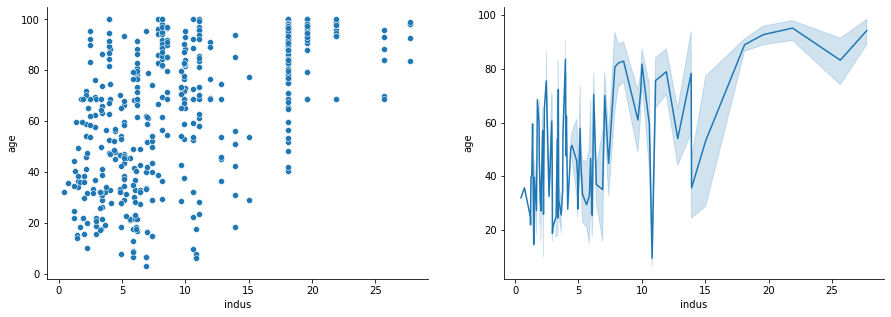

In [59]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['age'], data = imputed_df)

correlation: -0.6996391156201847


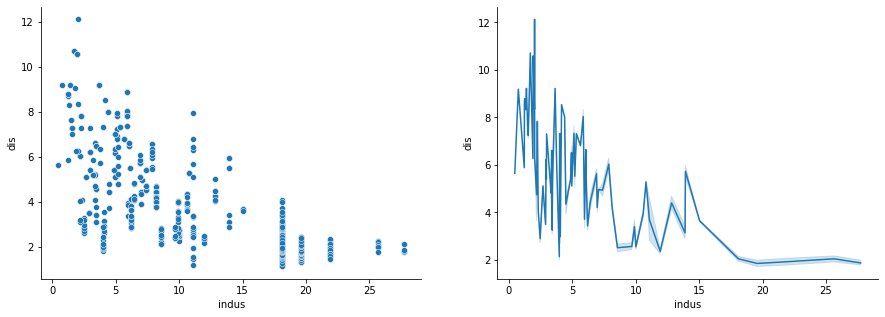

In [60]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['dis'], data = imputed_df)

correlation: 0.5931764561850582


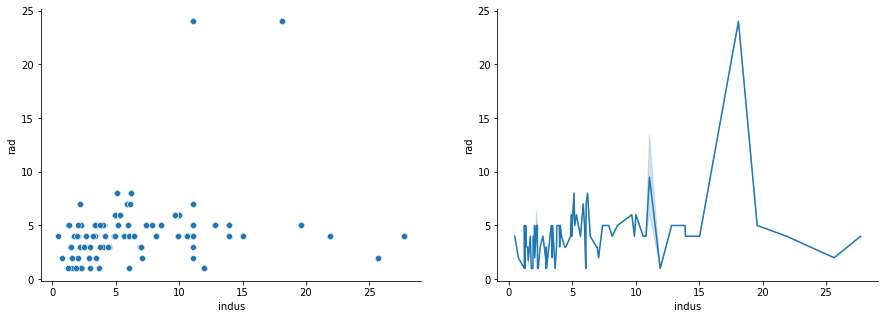

In [61]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['rad'], data = imputed_df)

correlation: 0.7160623235191138


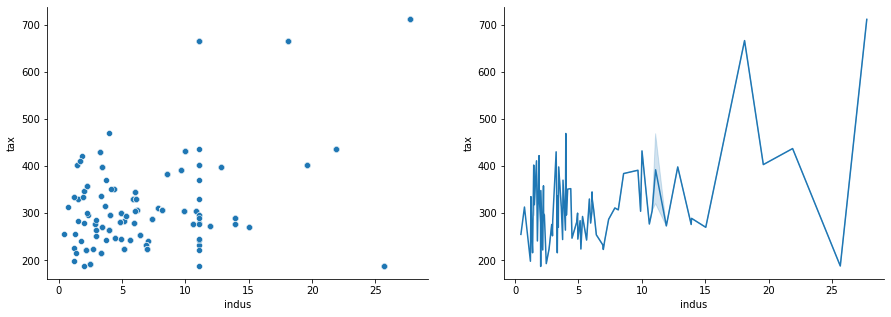

In [62]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['tax'], data = imputed_df)

correlation: 0.3848059245550865


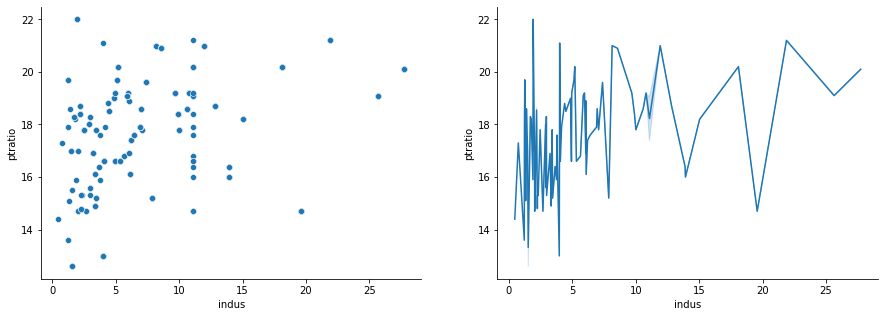

In [63]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['ptratio'], data = imputed_df)

correlation: -0.35459661982648993


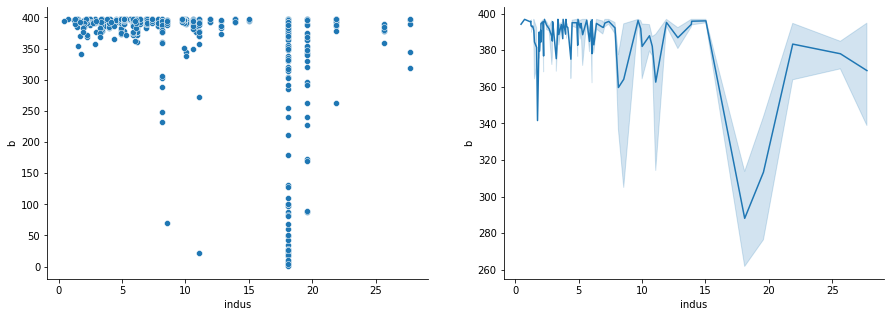

In [64]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['b'], data = imputed_df)

correlation: 0.5673538401527123


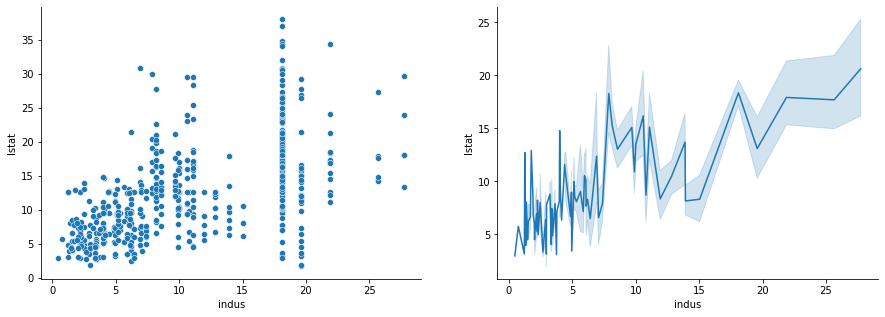

In [65]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['lstat'], data = imputed_df)

correlation: -0.4786573341553264


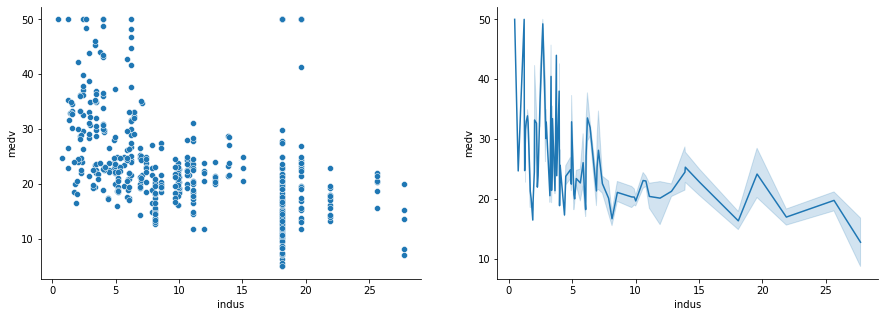

In [66]:
bi_variate(x = imputed_df['indus'],y=  imputed_df['medv'], data = imputed_df)

### Chas

correlation: 0.07328554898021557


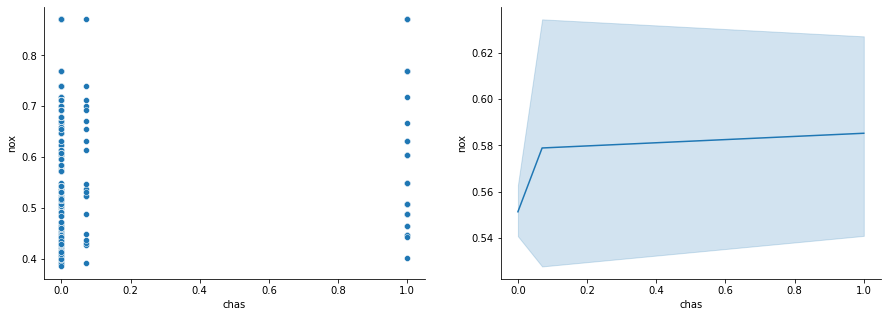

In [67]:
bi_variate(x = imputed_df['chas'],y=  imputed_df['nox'], data = imputed_df)

correlation: 0.10228389071959773


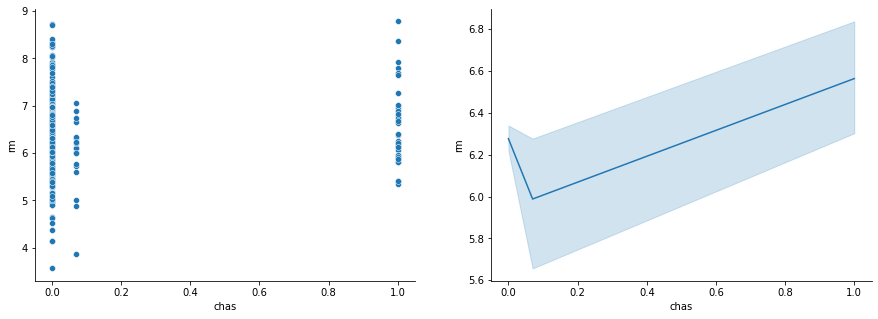

In [68]:
bi_variate(x = imputed_df['chas'],y=  imputed_df['rm'], data = imputed_df)

correlation: 0.0752063662126641


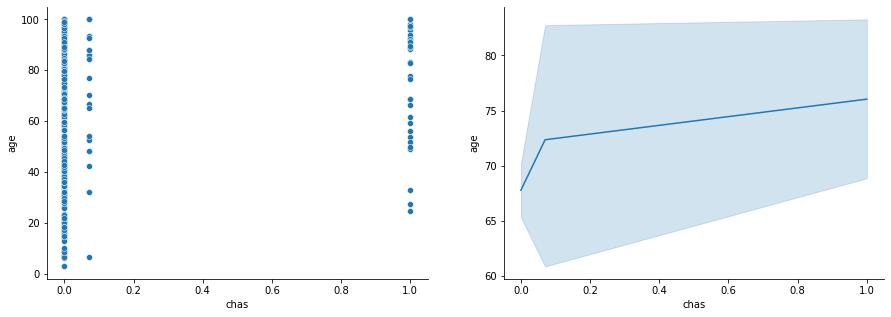

In [69]:
bi_variate(x = imputed_df['chas'],y=  imputed_df['age'], data = imputed_df)

correlation: -0.09168031758761568


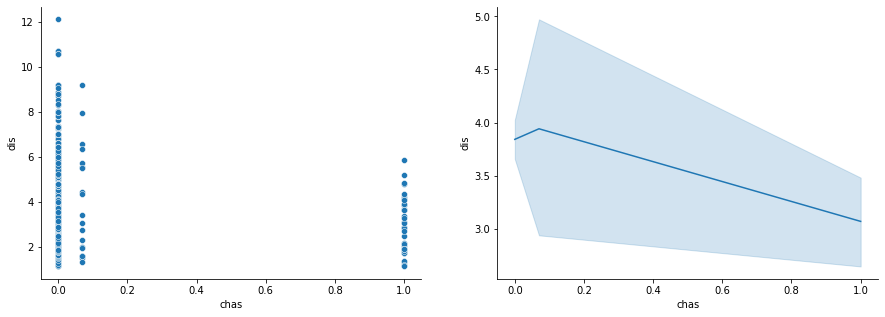

In [70]:
bi_variate(x = imputed_df['chas'],y=  imputed_df['dis'], data = imputed_df)

correlation: 0.0014249544754287313


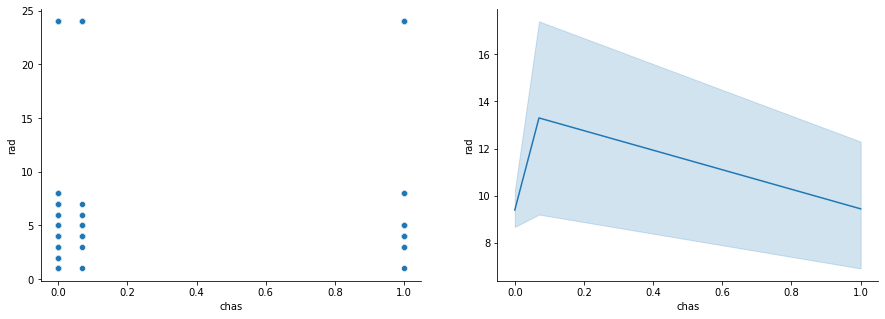

In [71]:
bi_variate(x = imputed_df['chas'],y=  imputed_df['rad'], data = imputed_df)

correlation: -0.03148282224988135


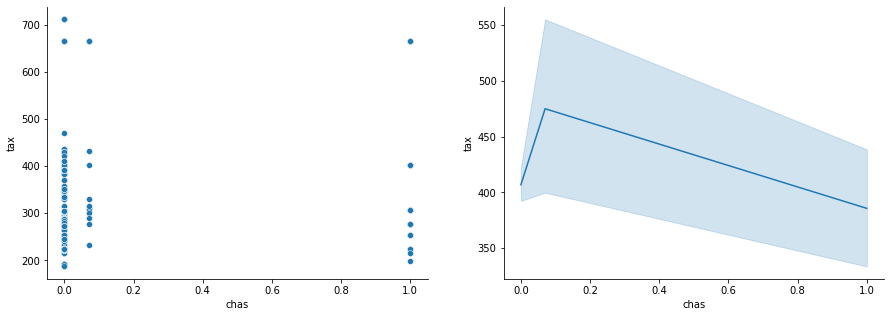

In [72]:
bi_variate(x = imputed_df['chas'],y=  imputed_df['tax'], data = imputed_df)

correlation: -0.10930995291234921


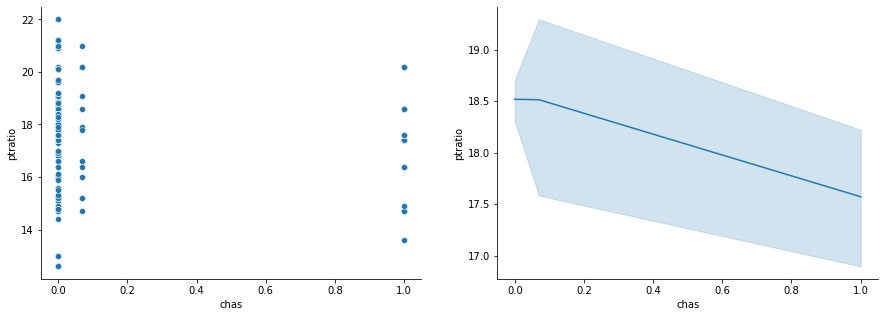

In [73]:
bi_variate(x = imputed_df['chas'],y=  imputed_df['ptratio'], data = imputed_df)

correlation: 0.050054508011892034


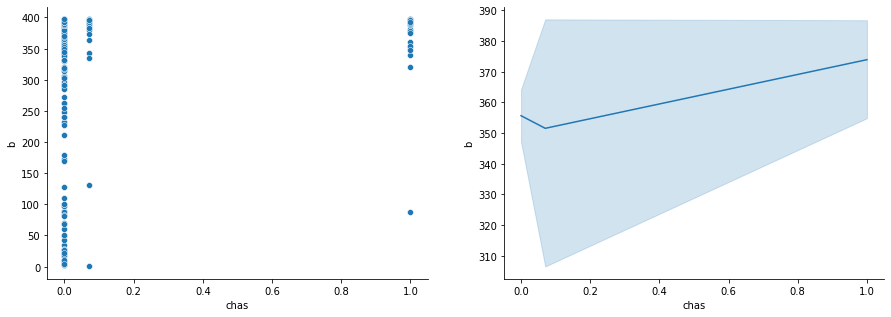

In [74]:
bi_variate(x = imputed_df['chas'],y=  imputed_df['b'], data = imputed_df)

correlation: -0.04616578164439706


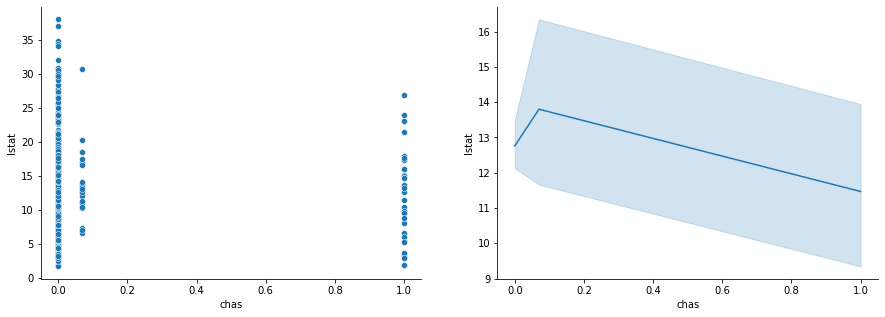

In [75]:
bi_variate(x = imputed_df['chas'],y=  imputed_df['lstat'], data = imputed_df)

correlation: 0.1798824998367599


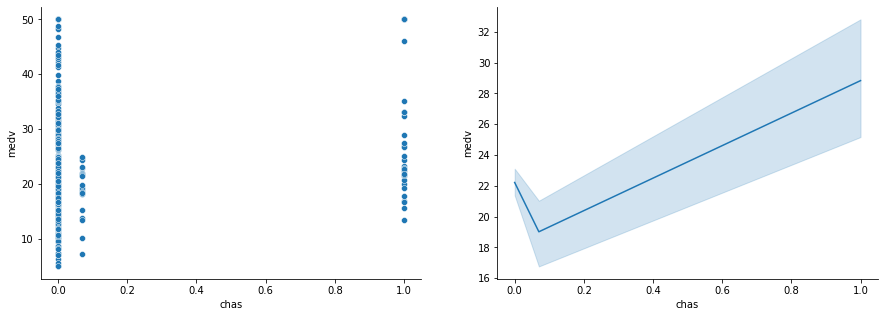

In [76]:
bi_variate(x = imputed_df['chas'],y=  imputed_df['medv'], data = imputed_df)

## Nox

correlation: -0.3021881878495937


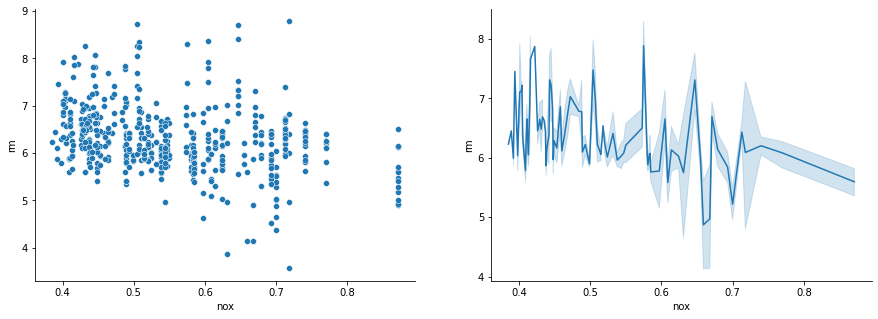

In [77]:
bi_variate(x = imputed_df['nox'],y=  imputed_df['rm'], data = imputed_df)

correlation: 0.7114613819868483


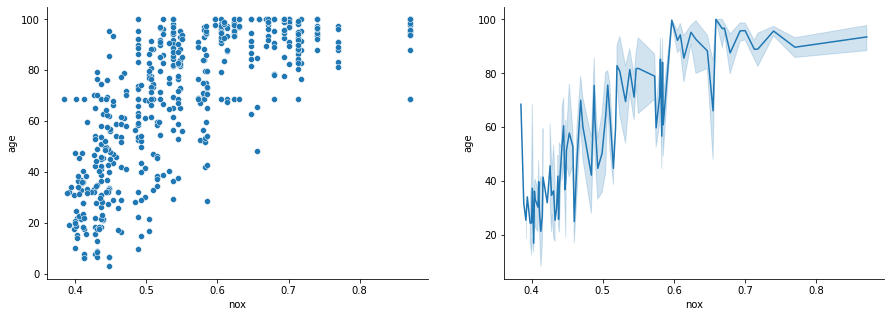

In [78]:
bi_variate(x = imputed_df['nox'],y=  imputed_df['age'], data = imputed_df)

correlation: -0.7692301132258277


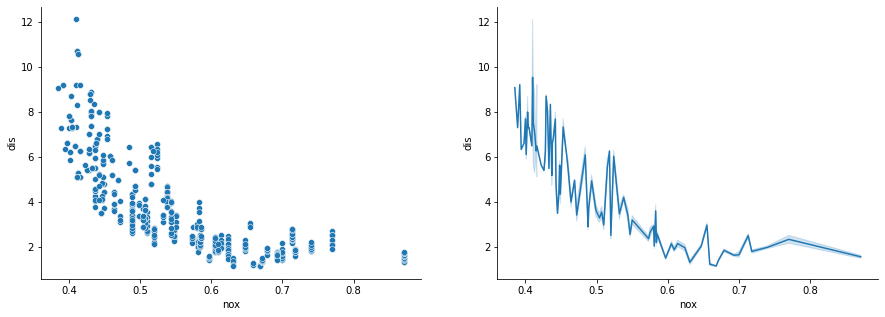

In [79]:
bi_variate(x = imputed_df['nox'],y=  imputed_df['dis'], data = imputed_df)

correlation: 0.6114405634855775


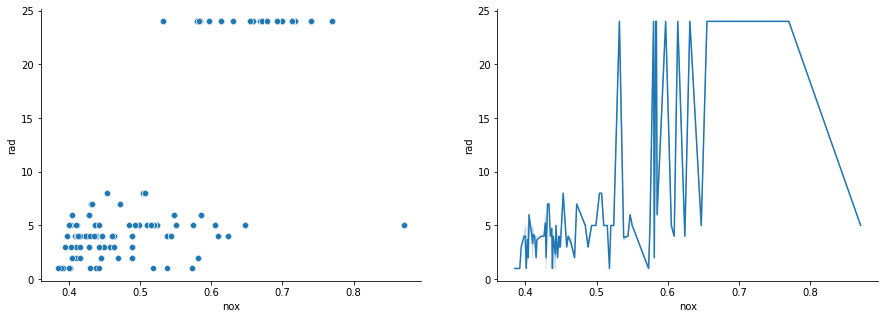

In [80]:
bi_variate(x = imputed_df['nox'],y=  imputed_df['rad'], data = imputed_df)

correlation: 0.6680232004030219


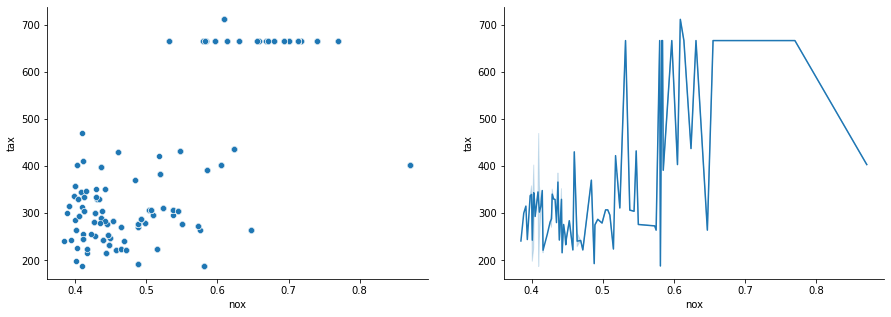

In [81]:
bi_variate(x = imputed_df['nox'],y=  imputed_df['tax'], data = imputed_df)

correlation: 0.1889326771127672


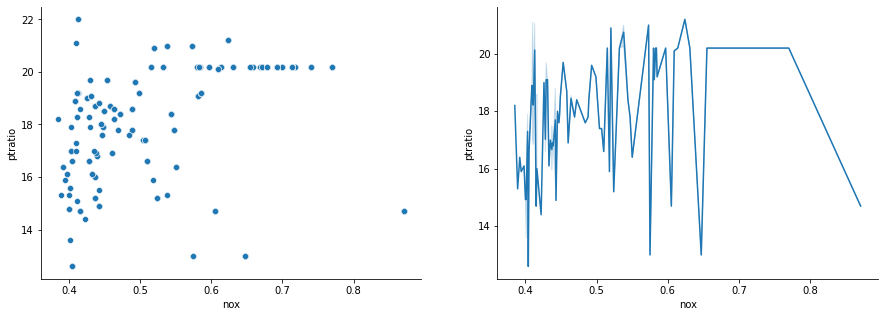

In [82]:
bi_variate(x = imputed_df['nox'],y=  imputed_df['ptratio'], data = imputed_df)

correlation: -0.3800506377924005


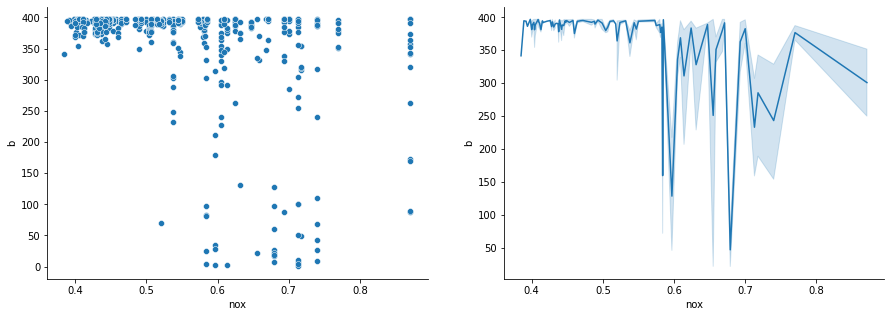

In [83]:
bi_variate(x = imputed_df['nox'],y=  imputed_df['b'], data = imputed_df)

correlation: 0.5723792229384503


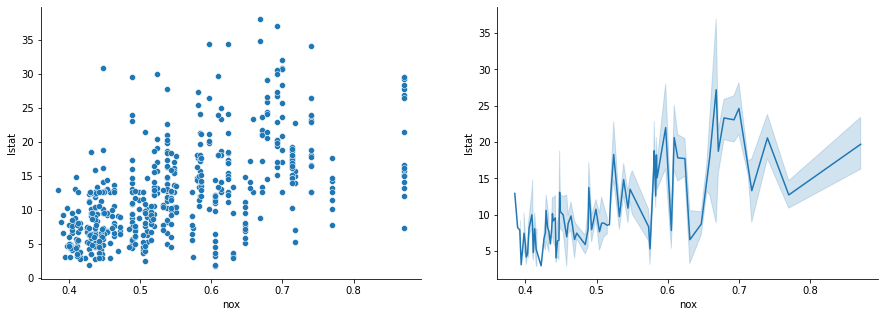

In [84]:
bi_variate(x = imputed_df['nox'],y=  imputed_df['lstat'], data = imputed_df)

correlation: -0.42732077237328253


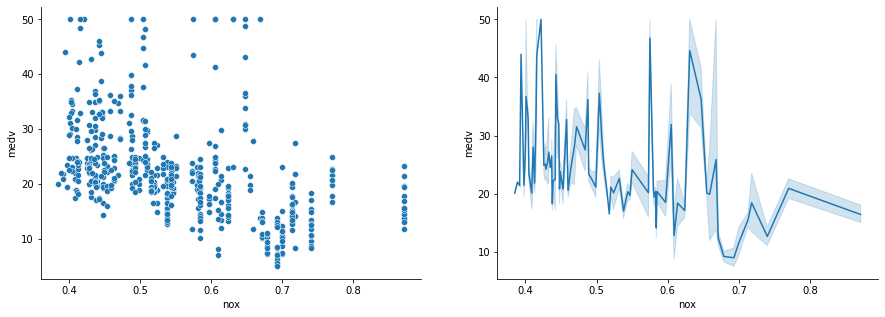

In [85]:
bi_variate(x = imputed_df['nox'],y=  imputed_df['medv'], data = imputed_df)

### rm

correlation: -0.241350701305872


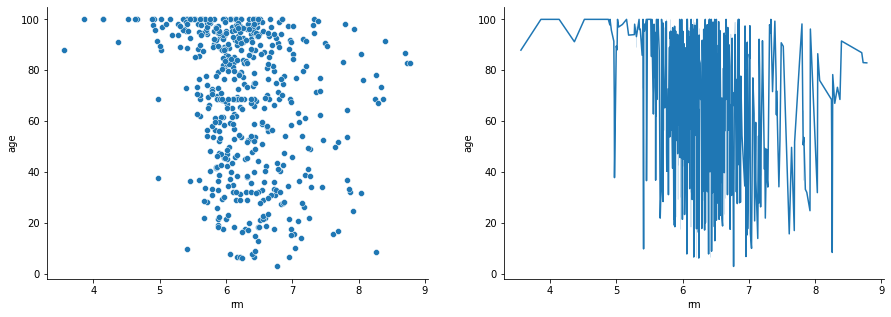

In [86]:
bi_variate(x = imputed_df['rm'],y=  imputed_df['age'], data = imputed_df)

correlation: 0.20524621293005507


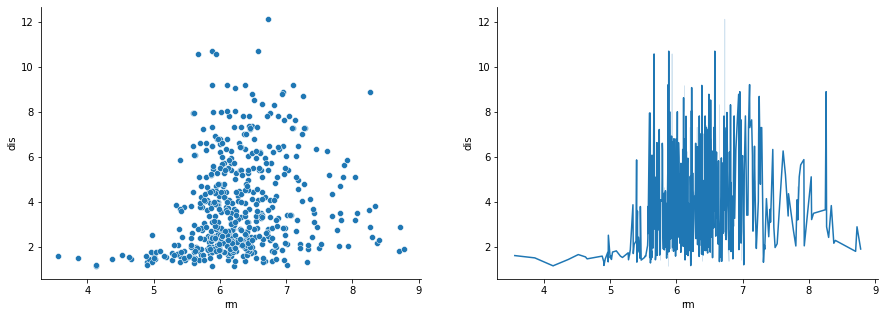

In [87]:
bi_variate(x = imputed_df['rm'],y=  imputed_df['dis'], data = imputed_df)

correlation: -0.20984666776610902


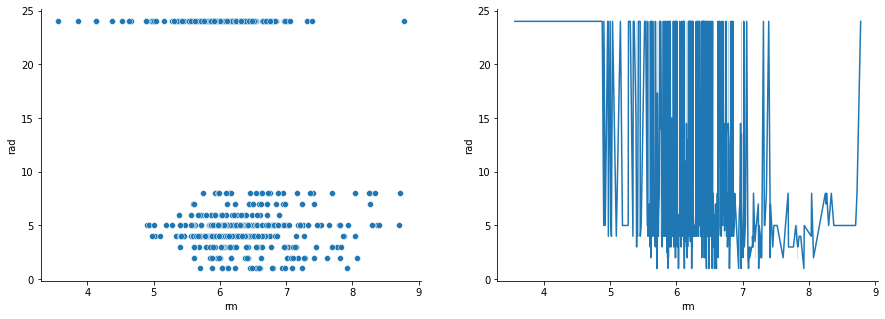

In [88]:
bi_variate(x = imputed_df['rm'],y=  imputed_df['rad'], data = imputed_df)

correlation: -0.2920478326232196


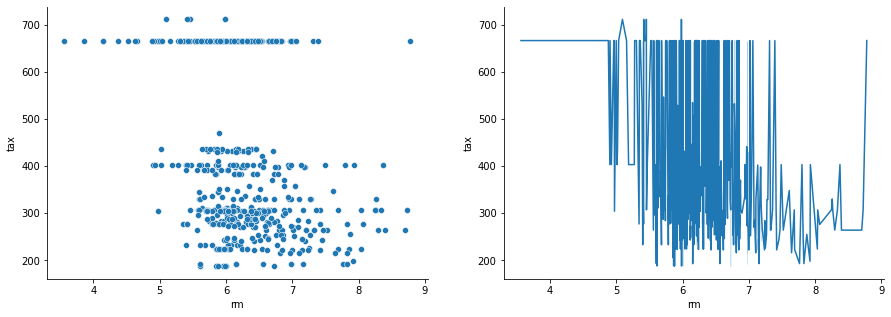

In [89]:
bi_variate(x = imputed_df['rm'],y=  imputed_df['tax'], data = imputed_df)

correlation: -0.35550149455908503


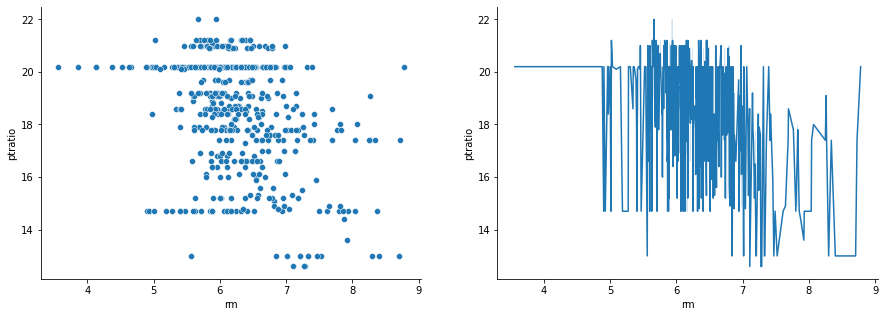

In [90]:
bi_variate(x = imputed_df['rm'],y=  imputed_df['ptratio'], data = imputed_df)

correlation: 0.12806863509254313


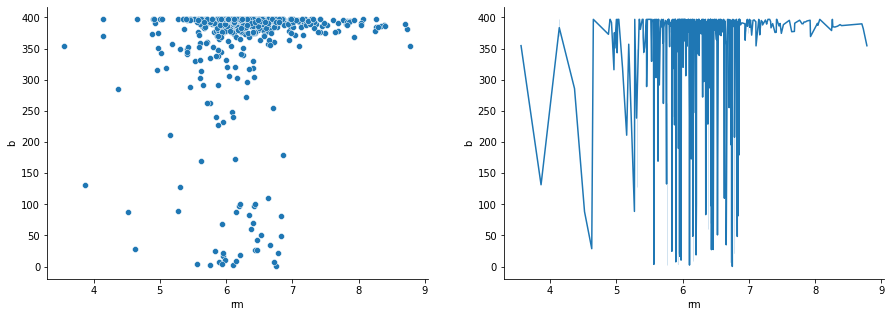

In [91]:
bi_variate(x = imputed_df['rm'],y=  imputed_df['b'], data = imputed_df)

correlation: -0.6029620458961767


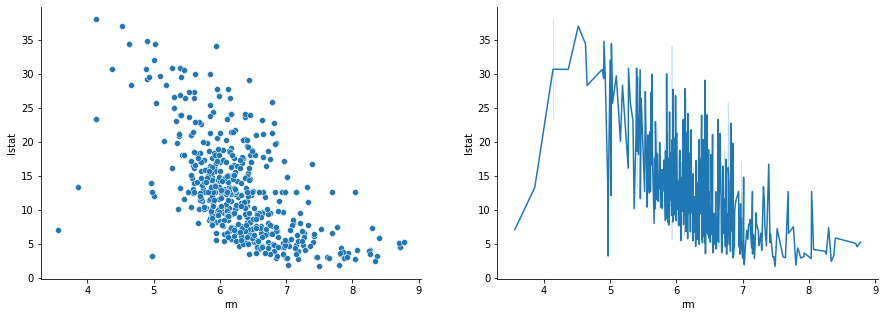

In [92]:
bi_variate(x = imputed_df['rm'],y=  imputed_df['lstat'], data = imputed_df)

correlation: 0.6953599470715394


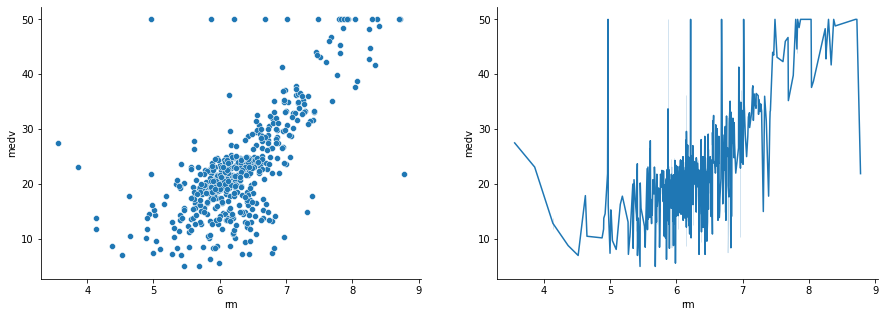

In [93]:
bi_variate(x = imputed_df['rm'],y=  imputed_df['medv'], data = imputed_df)

### Age

correlation: -0.724353083632519


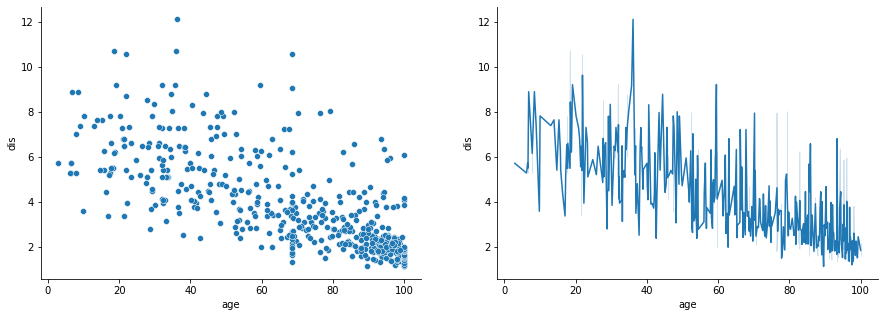

In [94]:
bi_variate(x = imputed_df['age'],y=  imputed_df['dis'], data = imputed_df)

correlation: 0.4499886632446566


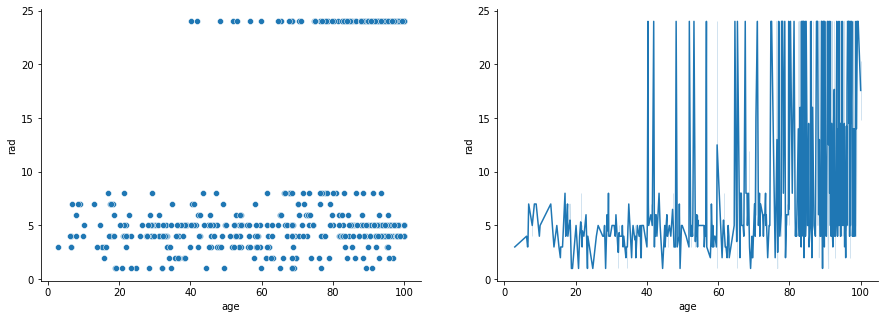

In [95]:
bi_variate(x = imputed_df['age'],y=  imputed_df['rad'], data = imputed_df)

correlation: 0.4499886632446566


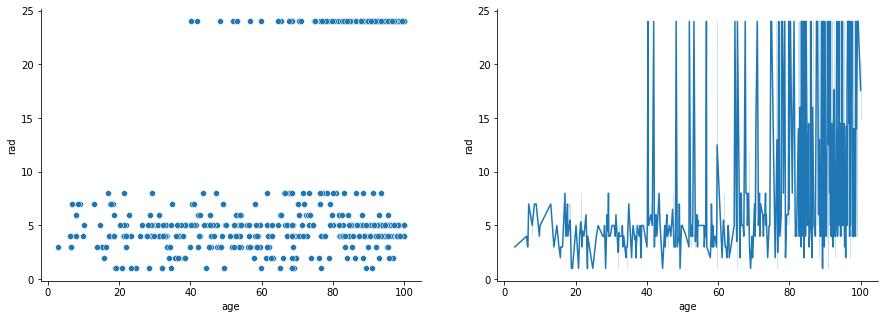

In [96]:
bi_variate(x = imputed_df['age'],y=  imputed_df['rad'], data = imputed_df)

correlation: 0.4499886632446566


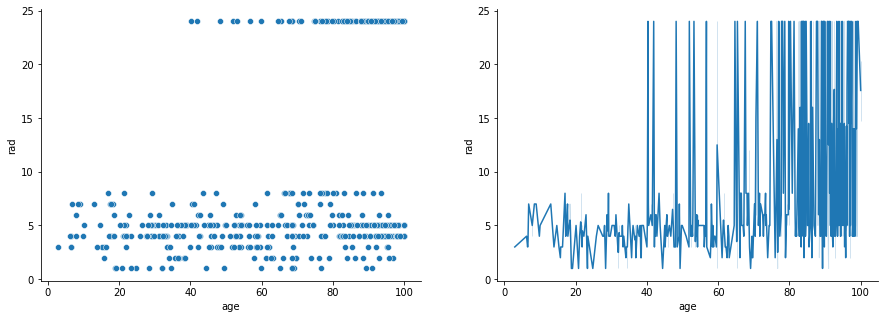

In [97]:
bi_variate(x = imputed_df['age'],y=  imputed_df['rad'], data = imputed_df)

correlation: 0.5005893776321158


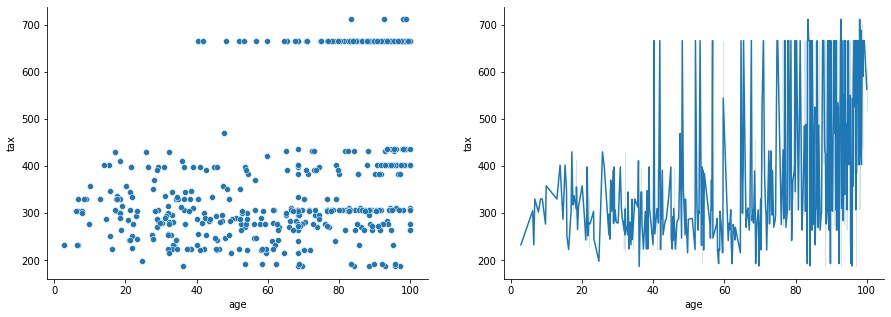

In [98]:
bi_variate(x = imputed_df['age'],y=  imputed_df['tax'], data = imputed_df)

correlation: 0.2627233956671447


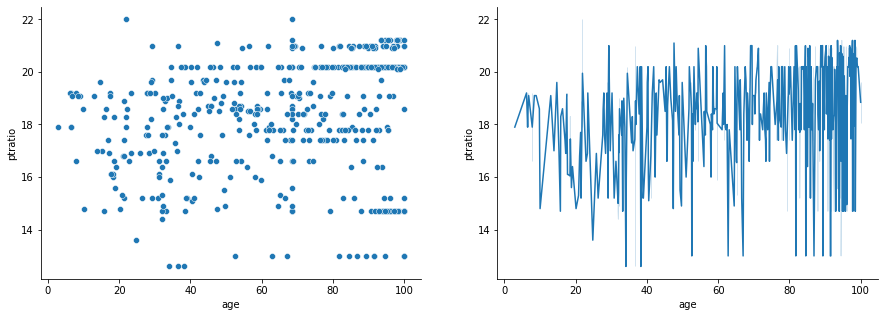

In [99]:
bi_variate(x = imputed_df['age'],y=  imputed_df['ptratio'], data = imputed_df)

correlation: -0.26528226552174944


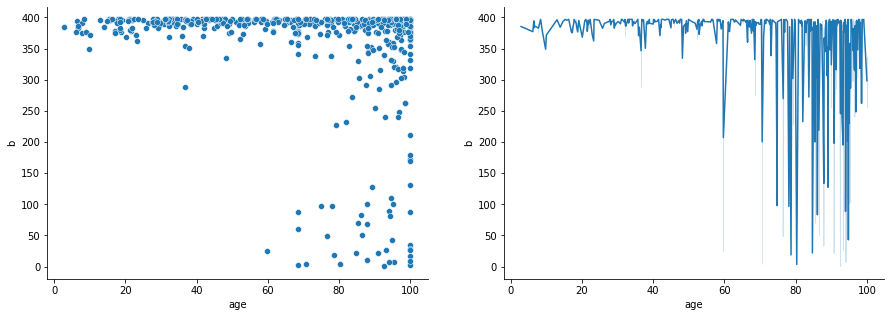

In [100]:
bi_variate(x = imputed_df['age'],y=  imputed_df['b'], data = imputed_df)

correlation: 0.5748928917493683


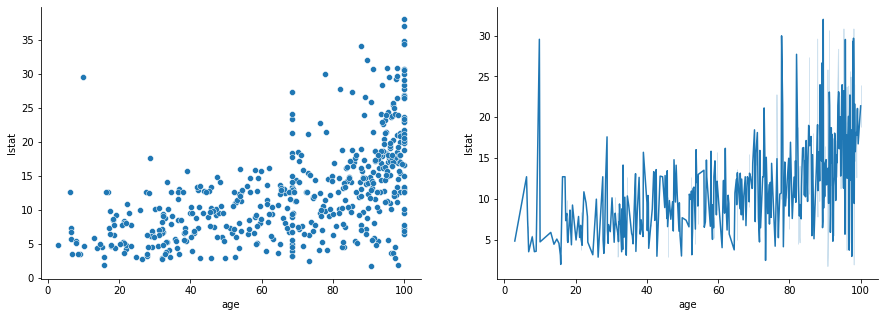

In [101]:
bi_variate(x = imputed_df['age'],y=  imputed_df['lstat'], data = imputed_df)

correlation: -0.38022344003030434


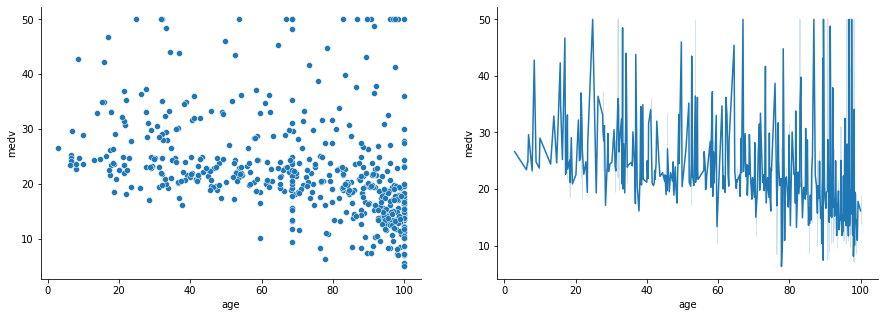

In [102]:
bi_variate(x = imputed_df['age'],y=  imputed_df['medv'], data = imputed_df)

### dis

correlation: -0.4945879296720753


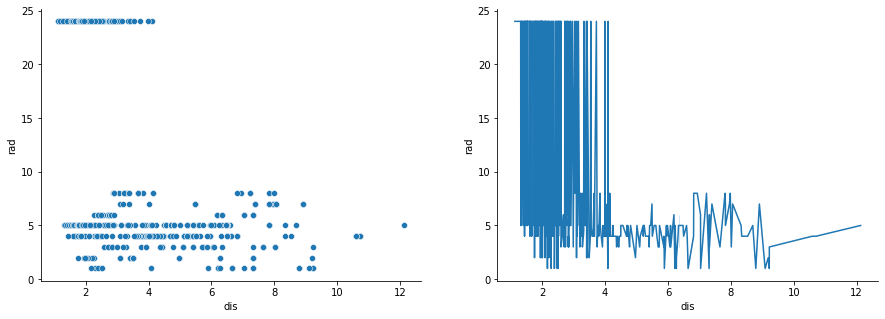

In [103]:
bi_variate(x = imputed_df['dis'],y=  imputed_df['rad'], data = imputed_df)

correlation: -0.4945879296720753


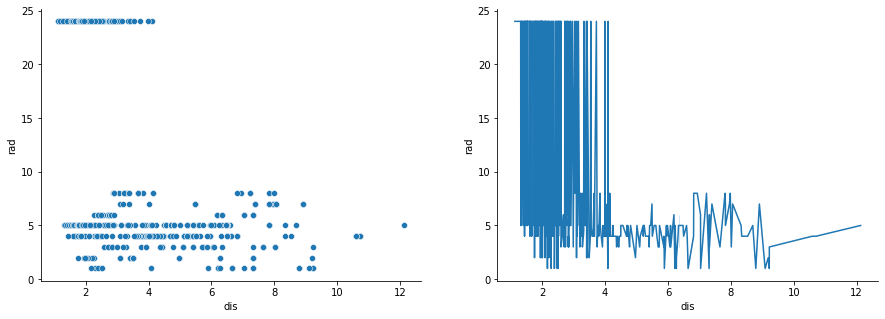

In [104]:
bi_variate(x = imputed_df['dis'],y=  imputed_df['rad'], data = imputed_df)

correlation: -0.5344315844084566


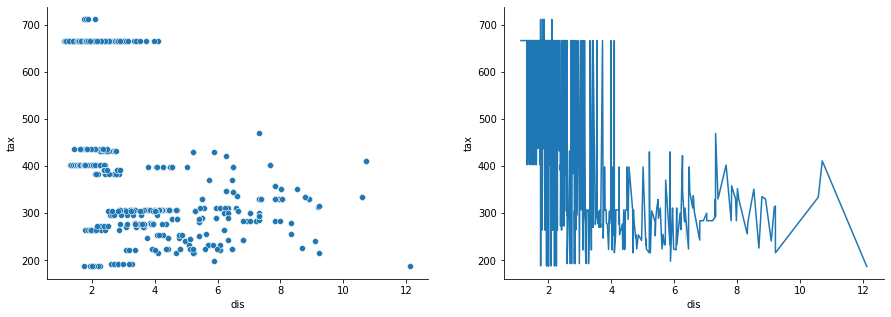

In [105]:
bi_variate(x = imputed_df['dis'],y=  imputed_df['tax'], data = imputed_df)

correlation: -0.5344315844084566


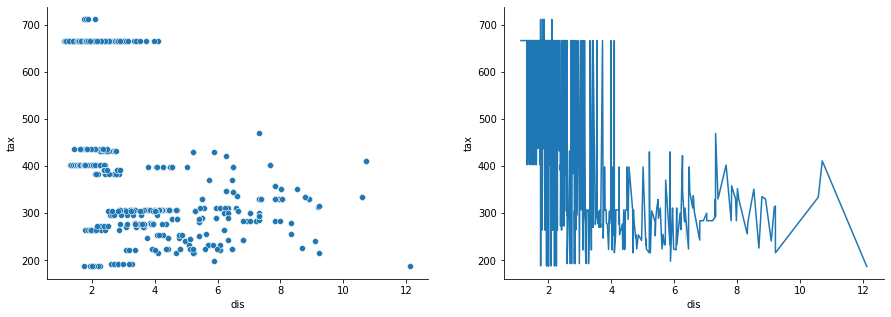

In [106]:
bi_variate(x = imputed_df['dis'],y=  imputed_df['tax'], data = imputed_df)

correlation: -0.23247054240825643


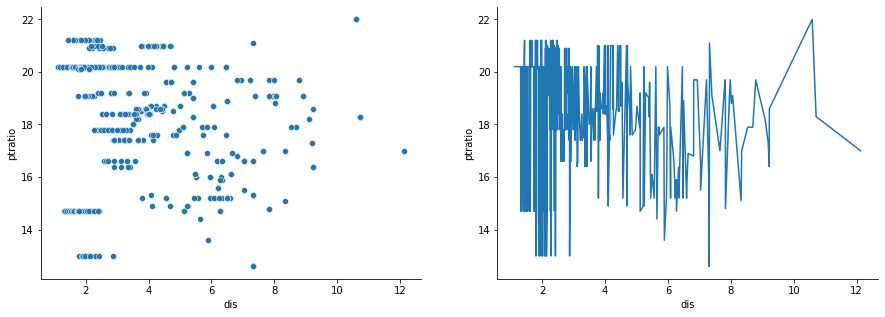

In [107]:
bi_variate(x = imputed_df['dis'],y=  imputed_df['ptratio'], data = imputed_df)

correlation: 0.2915116731330396


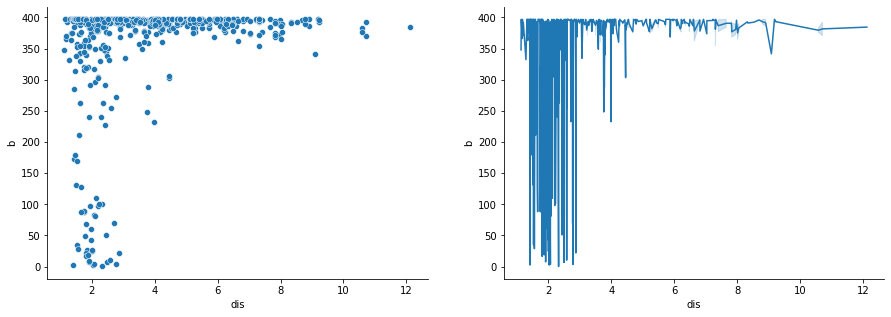

In [108]:
bi_variate(x = imputed_df['dis'],y=  imputed_df['b'], data = imputed_df)

correlation: -0.4834292646202026


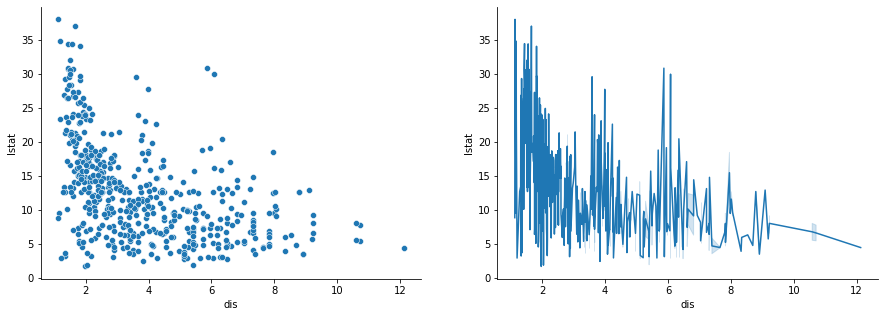

In [109]:
bi_variate(x = imputed_df['dis'],y=  imputed_df['lstat'], data = imputed_df)

correlation: 0.24992873408590385


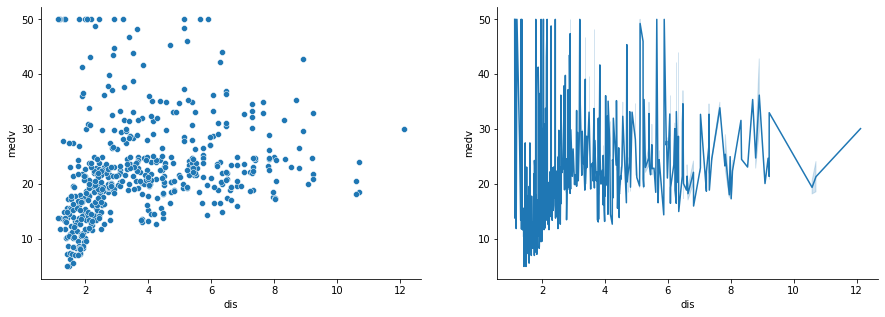

In [110]:
bi_variate(x = imputed_df['dis'],y=  imputed_df['medv'], data = imputed_df)

## Multivariate analysis

In [111]:
imputed_df.corr()

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.182930  0.391161 -0.052223  0.410377 -0.215434  0.344934   
zn      -0.182930  1.000000 -0.513336 -0.036147 -0.502287  0.316550 -0.541274   
indus    0.391161 -0.513336  1.000000  0.058035  0.740965 -0.381457  0.614592   
chas    -0.052223 -0.036147  0.058035  1.000000  0.073286  0.102284  0.075206   
nox      0.410377 -0.502287  0.740965  0.073286  1.000000 -0.302188  0.711461   
rm      -0.215434  0.316550 -0.381457  0.102284 -0.302188  1.000000 -0.241351   
age      0.344934 -0.541274  0.614592  0.075206  0.711461 -0.241351  1.000000   
dis     -0.366523  0.638388 -0.699639 -0.091680 -0.769230  0.205246 -0.724353   
rad      0.608886 -0.306316  0.593176  0.001425  0.611441 -0.209847  0.449989   
tax      0.566528 -0.308334  0.716062 -0.031483  0.668023 -0.292048  0.500589   
ptratio  0.273384 -0.403085  0.384806 -0.109310  0.188933 -0.355501  0.262723   
b       -0.370163  0.167431 -0.354597  0.050055 -0.380051  0.128069 -0.265282   
lstat    0.434044 -0.407549  0.567354 -0.046166  0.572379 -0.602962  0.574893   
medv    -0.379695  0.365943 -0.478657  0.179882 -0.427321  0.695360 -0.380223   

              dis       rad       tax   ptratio         b     lstat      medv  
crim    -0.366523  0.608886  0.566528  0.273384 -0.370163  0.434044 -0.379695  
zn       0.638388 -0.306316 -0.308334 -0.403085  0.167431 -0.407549  0.365943  
indus   -0.699639  0.593176  0.716062  0.384806 -0.354597  0.567354 -0.478657  
chas    -0.091680  0.001425 -0.031483 -0.109310  0.050055 -0.046166  0.179882  
nox     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.572379 -0.427321  
rm       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.602962  0.695360  
age     -0.724353  0.449989  0.500589  0.262723 -0.265282  0.574893 -0.380223  
dis      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.483429  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.468440 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.524545 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000 -0.177383  0.373343 -0.507787  
b        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.368886  0.333461  
lstat   -0.483429  0.468440  0.524545  0.373343 -0.368886  1.000000 -0.721975  
medv     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.721975  1.000000

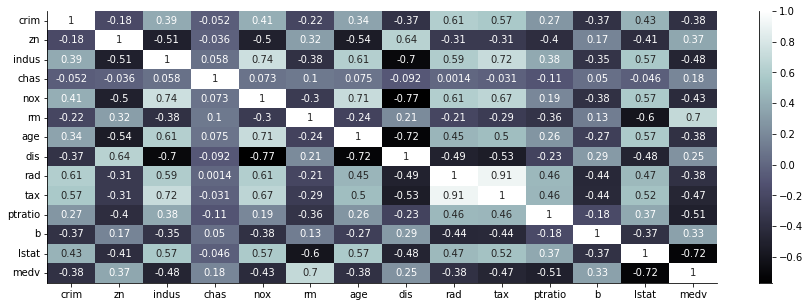

In [112]:
plt.figure(figsize= (15,5))
sns.heatmap(imputed_df.corr(), annot= True, cmap= 'bone')
sns.despine()